# Basic Finance Walkthrough with yfinance

Fixed version: handles MultiIndex columns from yfinance.

In [27]:
!pip install yfinance

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)

In [29]:
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2024-01-01', auto_adjust=False)

# FIX: handle MultiIndex columns
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-01-03,178.270294,182.009995,182.880005,177.710007,177.830002,104487900
2022-01-04,176.007782,179.699997,182.940002,179.119995,182.630005,99310400
2022-01-05,171.326019,174.919998,180.169998,174.639999,179.610001,94537600
2022-01-06,168.465973,172.000000,175.300003,171.639999,172.699997,96904000
2022-01-07,168.632492,172.169998,174.139999,171.029999,172.889999,86709100


In [30]:
data['MA_20'] = data['Adj Close'].rolling(window=20).mean()
data['MA_50'] = data['Adj Close'].rolling(window=50).mean()

data[['Adj Close','MA_20','MA_50']].head()

Price,Adj Close,MA_20,MA_50
Date,,,
2022-01-03,178.270294,NaN,NaN
2022-01-04,176.007782,NaN,NaN
2022-01-05,171.326019,NaN,NaN
2022-01-06,168.465973,NaN,NaN
2022-01-07,168.632492,NaN,NaN


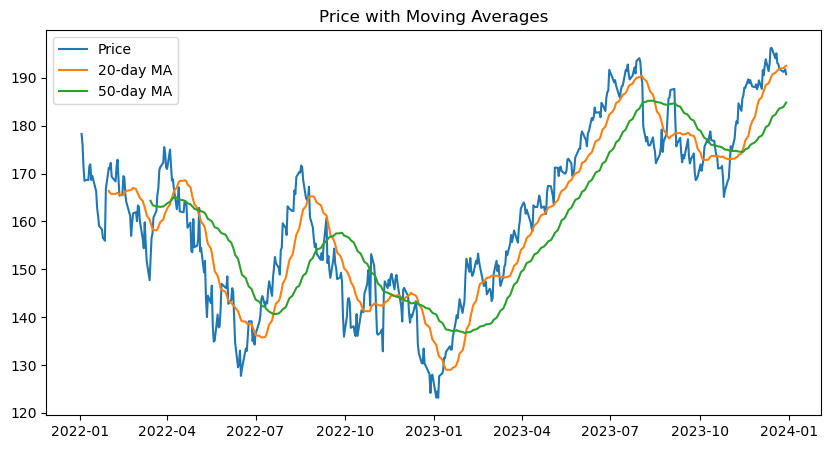

In [31]:
plt.plot(data.index, data['Adj Close'], label='Price')
plt.plot(data.index, data['MA_20'], label='20-day MA')
plt.plot(data.index, data['MA_50'], label='50-day MA')
plt.legend()
plt.title('Price with Moving Averages')
plt.show()

In [32]:
data['Daily Return'] = data['Adj Close'].pct_change()
data['Daily Return'].head()

Date
2022-01-03         NaN
2022-01-04   -0.012691
2022-01-05   -0.026600
2022-01-06   -0.016694
2022-01-07    0.000988
Name: Daily Return, dtype: float64

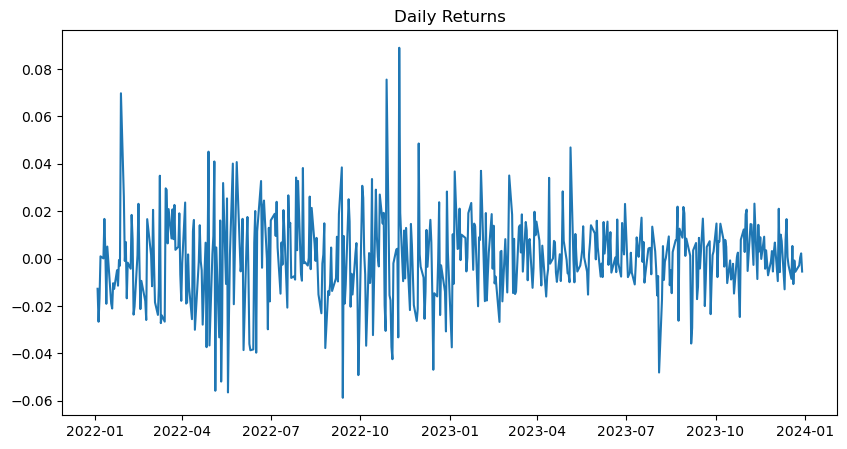

In [33]:
plt.plot(data.index, data['Daily Return'])
plt.title('Daily Returns')
plt.show()

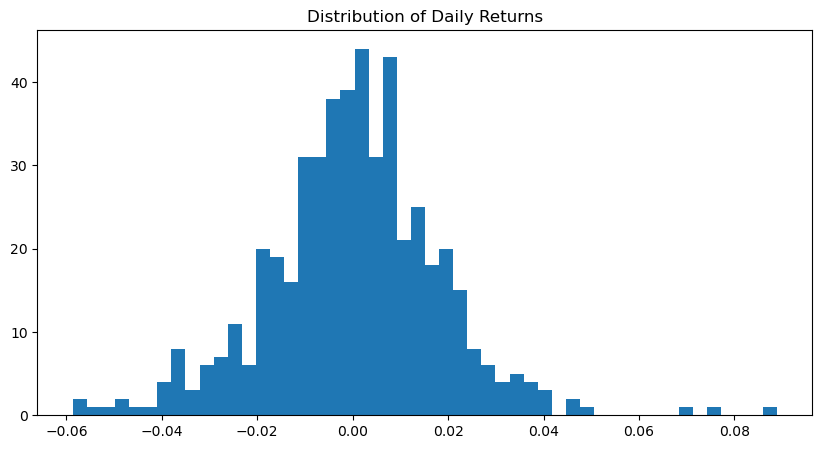

In [34]:
plt.hist(data['Daily Return'].dropna(), bins=50)
plt.title('Distribution of Daily Returns')
plt.show()

In [35]:
data['Signal'] = np.where(data['Adj Close'] > data['MA_20'], 1, -1)
data[['Adj Close','MA_20','Signal']].head()

Price,Adj Close,MA_20,Signal
Date,,,
2022-01-03,178.270294,NaN,-1
2022-01-04,176.007782,NaN,-1
2022-01-05,171.326019,NaN,-1
2022-01-06,168.465973,NaN,-1
2022-01-07,168.632492,NaN,-1
